2996
2994


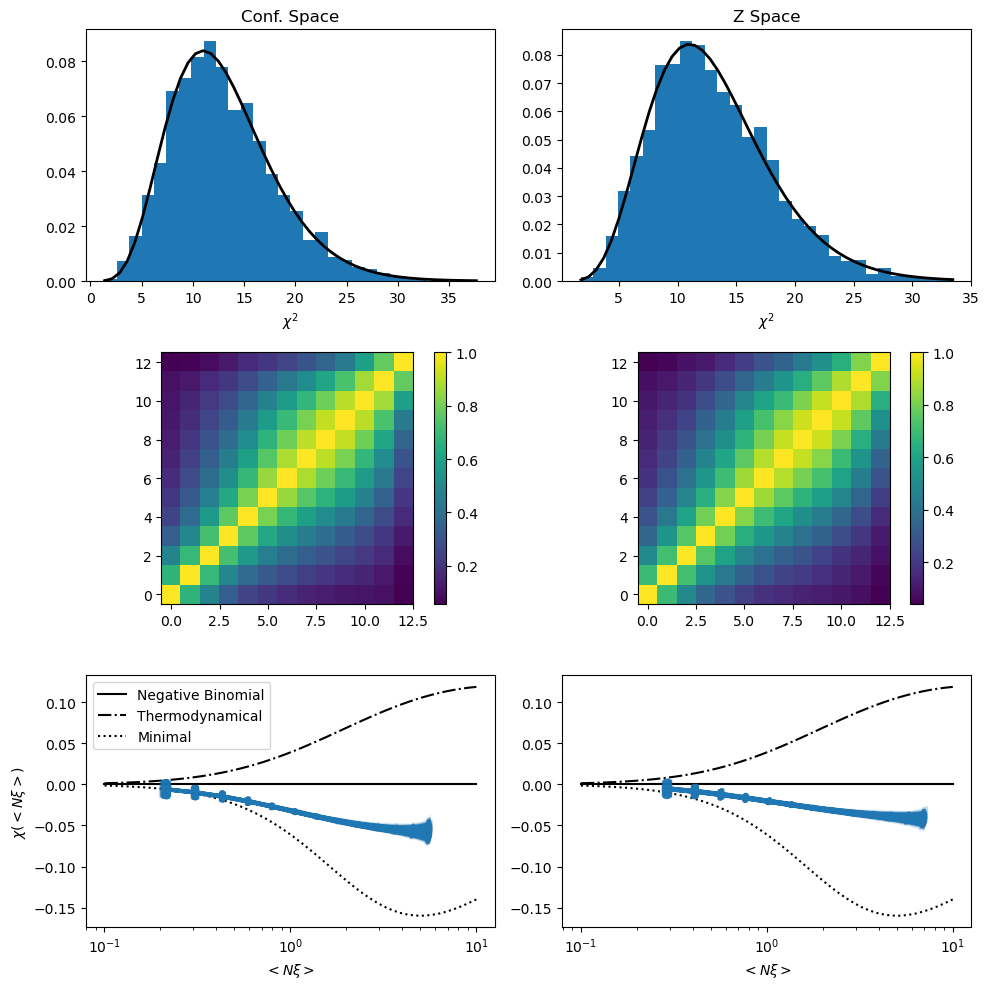

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x)-NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x)-NB(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x-NB(x),label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i]-NB(nxis[i]),yerr=chi_stds[i],c='C00',alpha=.1)

def get_filename(rmin,rmax,rbin,njk,ns,cosm,space):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}-*.dat'
    return filename

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Parameters
cosm = 'fiducial'
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(25)
njk = int(10)
space = 'zspace'
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = '../data/output/'

for space in ['rspace','zspace']:
    filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space)

    filelist = glob.glob(filedir+filename)
    nsim = len(filelist)
    print(nsim)

    chis = []
    nxis = []
    chi_stds = []

    # Read all files
    for file in filelist:
        #print(file)
        data = ascii.read(file)
        chis.append( data['chi'] )
        nxis.append( data['N_mean']*data['xi'] )
        chi_stds.append( data['chi_std'] )


    mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(chis))
    chisq = [compute_chisq(chi, mean, inverse_covariance) for chi in np.array(chis)]

    if space=='zspace': 
        col=1
    else:
        col=0
    plot_chisq(axs[0,col],chisq,30,'C00',rbin)
    plot_cov(axs[1,col],corrm)
    plot_rvps(axs[2,col],nxis,chis,chi_stds)

    axs[2,col].set_xscale('log')

axs[0,0].set_title('Conf. Space')
axs[0,1].set_title('Z Space')
#axs[0,1].sharey(axs[0,0])
#axs[0,1].set_yticklabels([])
axs[0,0].set_xlabel(r'$\chi^2$')
axs[0,1].set_xlabel(r'$\chi^2$')
axs[2,0].set_ylabel(r'$\chi (<N\xi>) $')
axs[2,0].set_xlabel(r'$<N\xi>$')
axs[2,1].set_xlabel(r'$<N\xi>$')
#axs[2,1].sharey(axs[2,0])
#axs[2,1].set_yticklabels([])
axs[2,0].legend()

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


2219


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


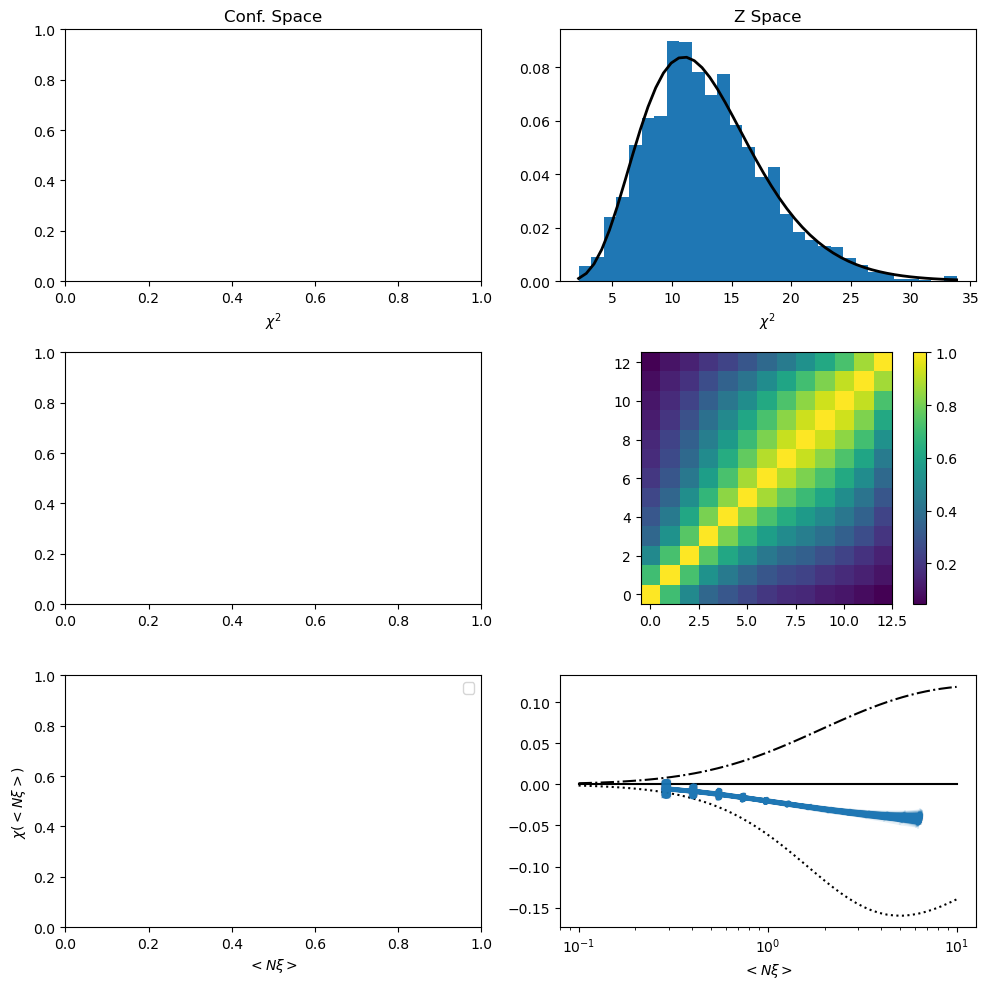

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x)-NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x)-NB(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x-NB(x),label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i]-NB(nxis[i]),yerr=chi_stds[i],c='C00',alpha=.1)

def get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Parameters
cosm = 'fiducial'
ns = int(1000000)
rbin = int(13)
rmin, rmax = 3., int(23)
njk = int(10)
axis = 1
space = 'zspace'
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = '../data/output/vpf/fiducial/'

for space in ['zspace']:
    filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis)

    filelist = glob.glob(filedir+filename)
    nsim = len(filelist)
    print(nsim)

    chis = []
    nxis = []
    chi_stds = []

    # Read all files
    for file in filelist:
        #print(file)
        data = ascii.read(file)
        chis.append( data['chi'] )
        nxis.append( data['N_mean']*data['xi'] )
        chi_stds.append( data['chi_std'] )


    mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(chis))
    chisq = [compute_chisq(chi, mean, inverse_covariance) for chi in np.array(chis)]

    if space=='zspace': 
        col=1
    else:
        col=0
    plot_chisq(axs[0,col],chisq,30,'C00',rbin)
    plot_cov(axs[1,col],corrm)
    plot_rvps(axs[2,col],nxis,chis,chi_stds)

    axs[2,col].set_xscale('log')

axs[0,0].set_title('Conf. Space')
axs[0,1].set_title('Z Space')
#axs[0,1].sharey(axs[0,0])
#axs[0,1].set_yticklabels([])
axs[0,0].set_xlabel(r'$\chi^2$')
axs[0,1].set_xlabel(r'$\chi^2$')
axs[2,0].set_ylabel(r'$\chi (<N\xi>) $')
axs[2,0].set_xlabel(r'$<N\xi>$')
axs[2,1].set_xlabel(r'$<N\xi>$')
#axs[2,1].sharey(axs[2,0])
#axs[2,1].set_yticklabels([])
axs[2,0].legend()

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


#### Let's see just P0

2219


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


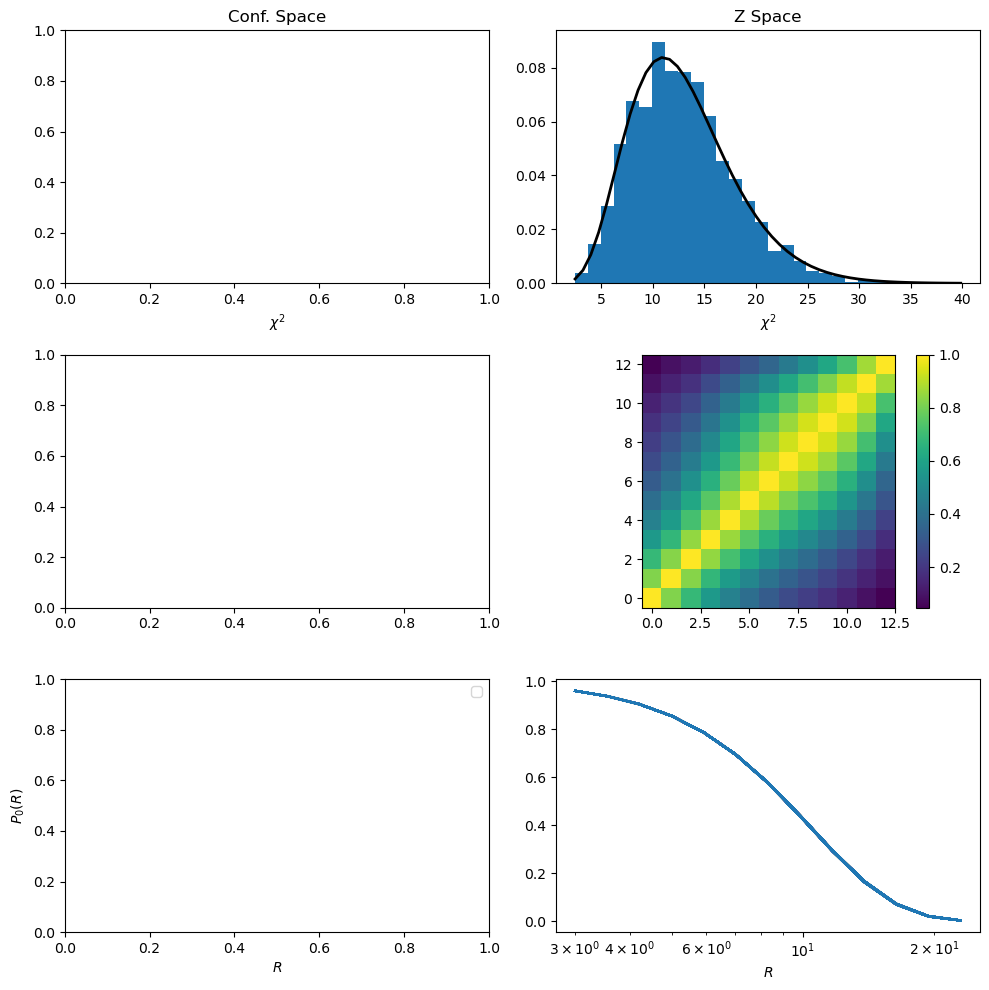

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x)-NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x)-NB(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x-NB(x),label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i]-NB(nxis[i]),yerr=chi_stds[i],c='C00',alpha=.1)

def plot_p0(ax,p0,rs):
    for i in range(len(p0)):
        ax.plot(rs,p0[i],c='C00',alpha=.1)

def get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Parameters
cosm = 'fiducial'
ns = int(1000000)
rbin = int(13)
rmin, rmax = 3., int(23)
njk = int(10)
axis = 1
space = 'zspace'
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = '../data/output/vpf/fiducial/'

for space in ['zspace']:
    filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis)

    filelist = glob.glob(filedir+filename)
    nsim = len(filelist)
    print(nsim)

    chis = []
    nxis = []
    chi_stds = []
    p0 = []

    # Read all files
    for file in filelist:
        #print(file)
        data = ascii.read(file)
        chis.append( data['chi'] )
        nxis.append( data['N_mean']*data['xi'] )
        chi_stds.append( data['chi_std'] )
        p0.append( data['P0'] )

    mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(p0))
    chisq = [compute_chisq(chi, mean, inverse_covariance) for chi in np.array(p0)]

    if space=='zspace': 
        col=1
    else:
        col=0
    plot_chisq(axs[0,col],chisq,30,'C00',rbin)
    plot_cov(axs[1,col],corrm)
    rs = np.geomspace(rmin,rmax,rbin)
    plot_p0(axs[2,col],p0,rs)

    axs[2,col].set_xscale('log')

axs[0,0].set_title('Conf. Space')
axs[0,1].set_title('Z Space')
#axs[0,1].sharey(axs[0,0])
#axs[0,1].set_yticklabels([])
axs[0,0].set_xlabel(r'$\chi^2$')
axs[0,1].set_xlabel(r'$\chi^2$')
axs[2,0].set_ylabel(r'$P_0(R)$')
axs[2,0].set_xlabel(r'$R$')
axs[2,1].set_xlabel(r'$R$')
#axs[2,1].sharey(axs[2,0])
#axs[2,1].set_yticklabels([])
axs[2,0].legend()

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


## Same for 2pcf

### Range: 10-150Mpc/h

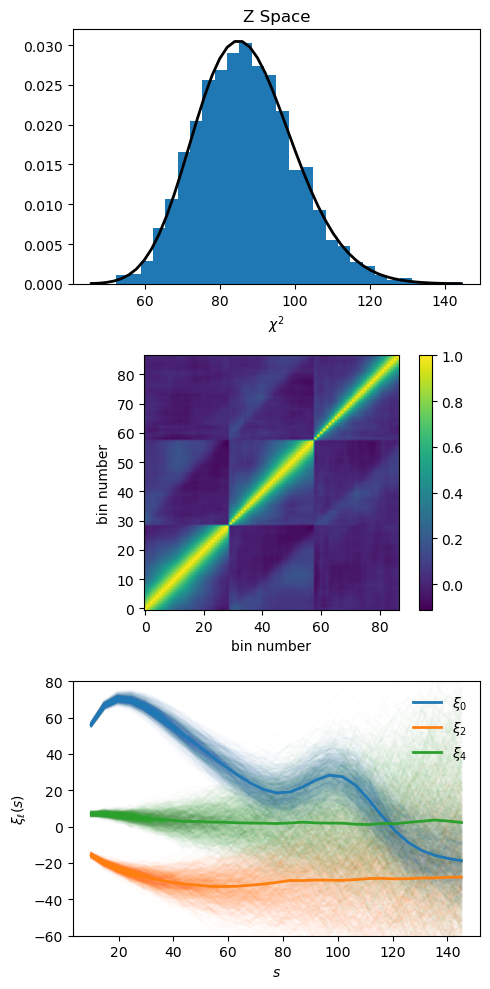

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_2pcfs(ax,xi_ls,s,nsim):

    xi0 = []
    xi2 = []
    xi4 = []

    for i in range(0,nsim,3):
        y0 = xi_ls[i][:len(s)]
        y2 = xi_ls[i][len(s):-len(s)]
        y4 = xi_ls[i][-len(s):]

        ax.plot(s,y0*s**2,c='C00',alpha=.01)
        ax.plot(s,-y2*s**2,c='C01',alpha=.01)
        ax.plot(s,y4*s**2,c='C02',alpha=.01)

        xi0.append(y0)
        xi2.append(y2)
        xi4.append(y4)

    y0mean = np.mean(xi0,axis=0)
    y2mean = np.mean(xi2,axis=0)
    y4mean = np.mean(xi4,axis=0)
    ax.plot(s,y0mean*s**2,c='C00',lw=2,label=r'$\xi_0$')
    ax.plot(s,-y2mean*s**2,c='C01',lw=2,label=r'$\xi_2$')
    ax.plot(s,y4mean*s**2,c='C02',lw=2,label=r'$\xi_4$')


def get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis):
    filename = f'2pcfdata_{rmin}-{rmax}-{nbins_m}-{nbins_s}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 1, figsize=(5, 10))

# Parameters
cosm = 'fiducial'
rmin, rmax = 10, 150
nbins_m = 30
nbins_s = 29
space = 'zspace'
axis = 0
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = f'../data/output/2pcf/{cosm}/'

filename = get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis)

filelist = glob.glob(filedir+filename)
nsim = len(filelist)

xi_ls = []
nxis = []
chi_stds = []

# Read all files
for file in filelist:
    data = ascii.read(file)
    xi_ls.append( np.concatenate((data['xi0'],data['xi2'],data['xi4']),axis=None) )

s = data['s']

mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(xi_ls))
chisq = [compute_chisq(xi_l, mean, inverse_covariance) for xi_l in np.array(xi_ls)]


plot_chisq(axs[0],chisq,30,'C00',len(xi_ls[0]))
plot_cov(axs[1],corrm)
plot_2pcfs(axs[2],xi_ls,s,nsim)

#axs[2].set_xscale('log')

axs[0].set_title('Z Space')

axs[0].set_xlabel(r'$\chi^2$')
axs[2].set_ylabel(r'$\xi_\ell(s)$')
axs[1].set_xlabel('bin number')
axs[1].set_ylabel('bin number')
axs[2].set_xlabel(r'$s$')
axs[2].set_ylim([-60,80])
axs[2].legend(loc=1,framealpha=0.)

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


### Range: 3-25Mpc/h (same as VPF)

Num of simulations: 2100


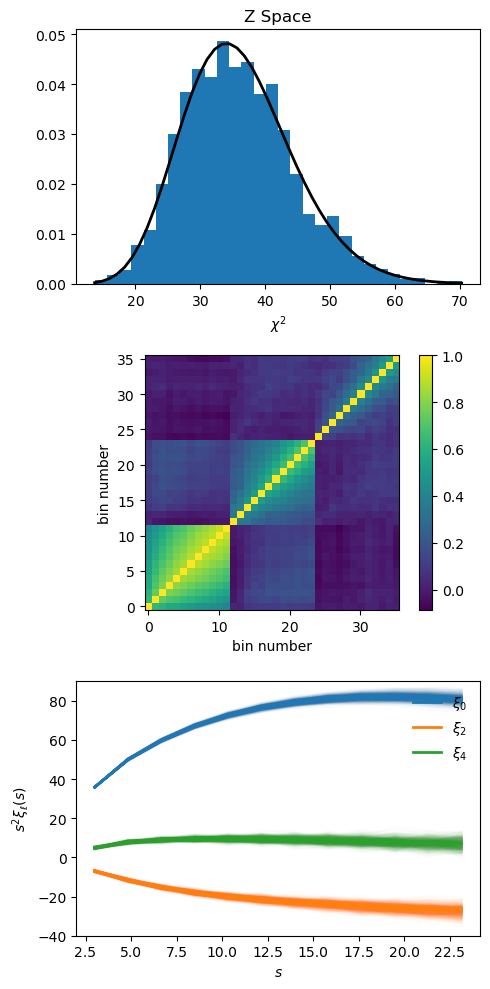

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_2pcfs(ax,xi_ls,s,nsim):

    xi0 = []
    xi2 = []
    xi4 = []

    for i in range(0,nsim,3):
        y0 = xi_ls[i][:len(s)]
        y2 = xi_ls[i][len(s):-len(s)]
        y4 = xi_ls[i][-len(s):]

        ax.plot(s,y0*s**2,c='C00',alpha=.01)
        ax.plot(s,-y2*s**2,c='C01',alpha=.01)
        ax.plot(s,y4*s**2,c='C02',alpha=.01)

        xi0.append(y0)
        xi2.append(y2)
        xi4.append(y4)

    y0mean = np.mean(xi0,axis=0)
    y2mean = np.mean(xi2,axis=0)
    y4mean = np.mean(xi4,axis=0)
    ax.plot(s,y0mean*s**2,c='C00',lw=2,label=r'$\xi_0$')
    ax.plot(s,-y2mean*s**2,c='C01',lw=2,label=r'$\xi_2$')
    ax.plot(s,y4mean*s**2,c='C02',lw=2,label=r'$\xi_4$')


def get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis):
    filename = f'2pcfdata_{rmin}-{rmax}-{nbins_m}-{nbins_s}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 1, figsize=(5, 10))

# Parameters
cosm = 'fiducial'
rmin, rmax = 3, 25
nbins_m = 30
nbins_s = 12
space = 'zspace'
axis = 0
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = f'../data/output/2pcf/{cosm}/'

filename = get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis)

filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print('Num of simulations:',nsim)

xi_ls = []
nxis = []
chi_stds = []

# Read all files
for file in filelist:
    data = ascii.read(file)
    xi_ls.append( np.concatenate((data['xi0'],data['xi2'],data['xi4']),axis=None) )

s = data['s']

mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(xi_ls))
chisq = [compute_chisq(xi_l, mean, inverse_covariance) for xi_l in np.array(xi_ls)]


plot_chisq(axs[0],chisq,30,'C00',len(xi_ls[0]))
plot_cov(axs[1],corrm)
plot_2pcfs(axs[2],xi_ls,s,nsim)

#axs[2].set_xscale('log')

axs[0].set_title('Z Space')

axs[0].set_xlabel(r'$\chi^2$')
axs[2].set_ylabel(r'$s^2\xi_\ell(s)$')
axs[1].set_xlabel('bin number')
axs[1].set_ylabel('bin number')
axs[2].set_xlabel(r'$s$')
axs[2].set_ylim([-40,90])
axs[2].legend(loc=1,framealpha=0.)

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


### Possibly final batch
### 2PCF range 3-150Mpc 29-30 bins


Num of simulations: 1212
        s         
------------------
               3.0
 8.068965517241379
13.137931034482758
18.206896551724135
23.275862068965516
28.344827586206897
 33.41379310344827
 38.48275862068965
 43.55172413793103
 48.62068965517241
               ...
 94.24137931034483
  99.3103448275862
104.37931034482759
109.44827586206895
114.51724137931033
119.58620689655172
 124.6551724137931
129.72413793103448
134.79310344827584
139.86206896551724
 144.9310344827586
Length = 29 rows [0.50182912 0.20977712 0.10345121 0.06331245 0.04000978 0.03146488
 0.02338662 0.01757087 0.01262955 0.00973429 0.00968564 0.00895517
 0.00944803 0.00772494 0.00664763 0.00636851 0.00539698 0.00462213
 0.00398947 0.00178895 0.00106529 0.00177752 0.00244918 0.00360958
 0.00312981 0.00276431 0.00305293 0.00272102 0.00241934]
        s         
------------------
               3.0
 8.068965517241379
13.137931034482758
18.206896551724135
23.275862068965516
28.344827586206897
 33.41379310344827
 38.48

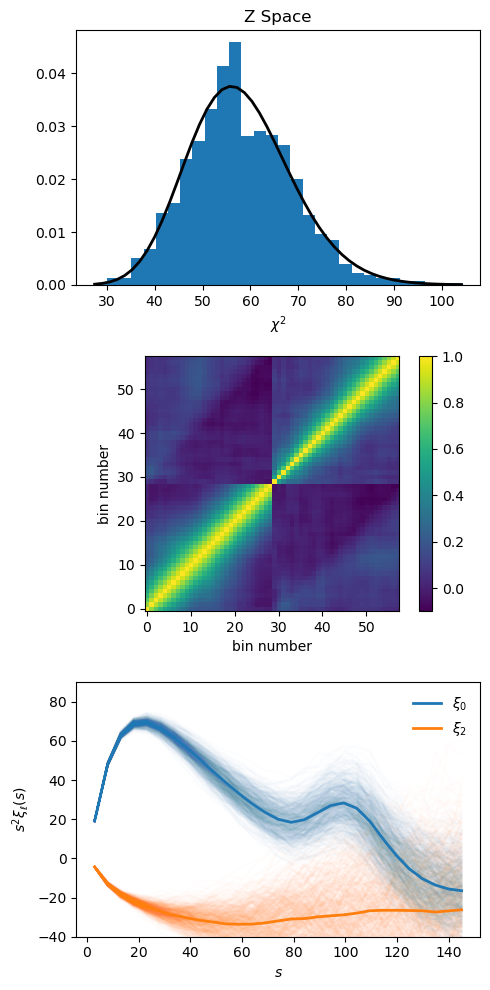

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_2pcfs(ax,xi_ls,s,nsim):

    xi0 = []
    xi2 = []
    #xi4 = []

    for i in range(0,nsim,2):
        y0 = xi_ls[i][:len(s)]
        y2 = xi_ls[i][len(s):]
        #y4 = xi_ls[i][-len(s):]

        ax.plot(s,y0*s**2,c='C00',alpha=.01)
        ax.plot(s,-y2*s**2,c='C01',alpha=.01)
        #ax.plot(s,y4*s**2,c='C02',alpha=.01)

        xi0.append(y0)
        xi2.append(y2)
        #xi4.append(y4)

    y0mean = np.mean(xi0,axis=0)
    y2mean = np.mean(xi2,axis=0)
    #y4mean = np.mean(xi4,axis=0)
    ax.plot(s,y0mean*s**2,c='C00',lw=2,label=r'$\xi_0$')
    ax.plot(s,-y2mean*s**2,c='C01',lw=2,label=r'$\xi_2$')
    #ax.plot(s,y4mean*s**2,c='C02',lw=2,label=r'$\xi_4$')


def get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis):
    filename = f'2pcfdata_{rmin}-{rmax}-{nbins_m}-{nbins_s}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 1, figsize=(5, 10))

# Parameters
cosm = 'fiducial'
rmin, rmax = 3, 150
nbins_m = 30
nbins_s = 29
space = 'zspace'
axis = 0
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = f'../data/output/2pcf/{cosm}/'

filename = get_filename(rmin,rmax,nbins_m,nbins_s,cosm,space,axis)

filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print('Num of simulations:',nsim)

xi_ls = []
nxis = []
chi_stds = []

# Read all files
for file in filelist:
    data = ascii.read(file)
    xi_ls.append( np.concatenate((data['xi0'],data['xi2']),axis=None) )

s = data['s']

mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(xi_ls))
chisq = [compute_chisq(xi_l, mean, inverse_covariance) for xi_l in np.array(xi_ls)]


plot_chisq(axs[0],chisq,30,'C00',len(xi_ls[0]))
plot_cov(axs[1],corrm)
plot_2pcfs(axs[2],xi_ls,s,nsim)

#axs[2].set_xscale('log')

axs[0].set_title('Z Space')

axs[0].set_xlabel(r'$\chi^2$')
axs[2].set_ylabel(r'$s^2\xi_\ell(s)$')
axs[1].set_xlabel('bin number')
axs[1].set_ylabel('bin number')
axs[2].set_xlabel(r'$s$')
axs[2].set_ylim([-40,90])
axs[2].legend(loc=1,framealpha=0.)

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()


#### Different batch of VPF: larger range and more bins

2218


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


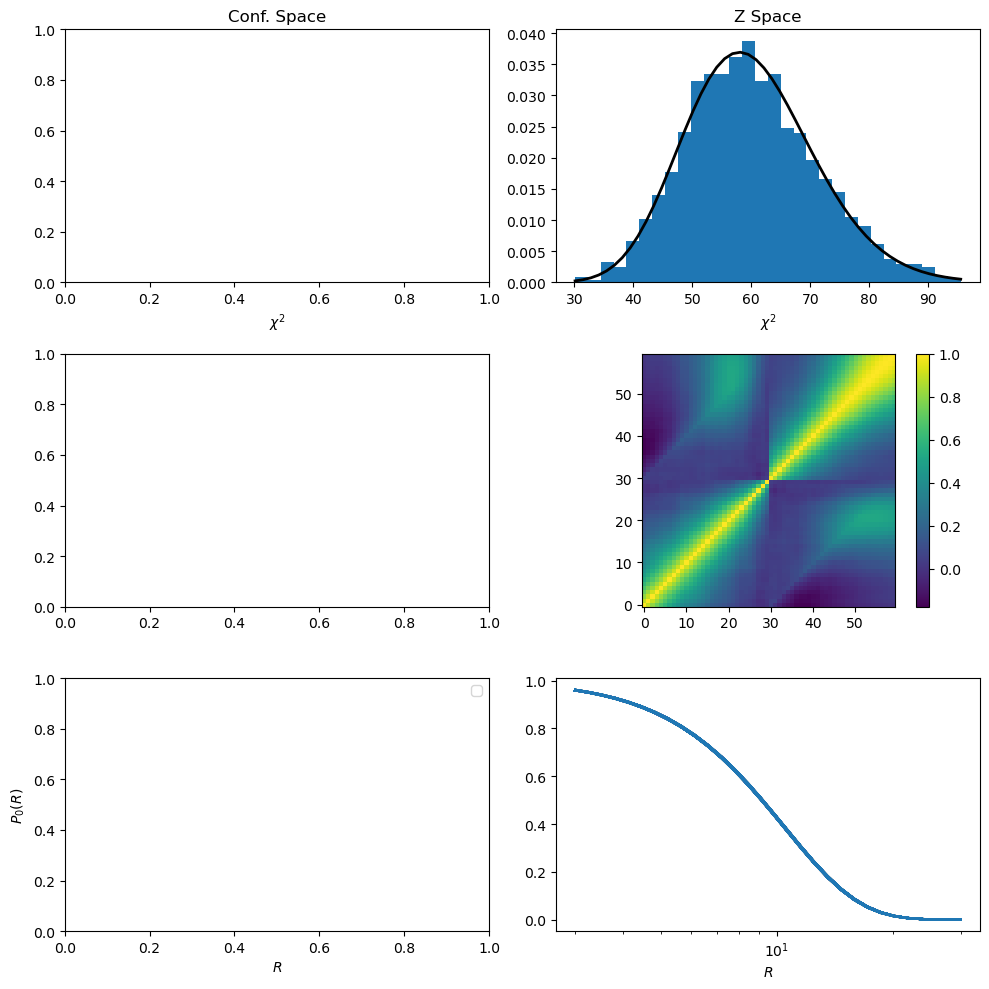

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob
from scipy import stats

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    corrm = np.corrcoef(summaries.T)
    return mean, covariance, inverse_covariance, corrm

def compute_chisq(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

def plot_chisq(ax,chisq,bins,color,dof):
    ax.hist(np.asarray(chisq).flatten(),bins=bins,color=color,density=True)
    x = np.linspace(np.min(chisq), np.max(chisq))
    ax.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

def plot_cov(ax,corrm):
    #row_sums = cov.sum(axis=1)
    #new_matrix = cov / row_sums[:, np.newaxis]
    im = ax.imshow(corrm)
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)

def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x)-NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x)-NB(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x-NB(x),label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i]-NB(nxis[i]),yerr=chi_stds[i],c='C00',alpha=.1)

def plot_p0(ax,p0,rs):
    for i in range(len(p0)):
        ax.plot(rs,p0[i],c='C00',alpha=.1)

def get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}{axis}-*.dat'
    return filename

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Parameters
cosm = 'fiducial'
ns = int(10000)
rbin = int(30)
rmin, rmax = 3., int(30)
njk = int(10)
axis = 0
space = 'zspace'
#filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
filedir = '../data/output/vpf/fiducial/'

for space in ['zspace']:
    filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space,axis)
    filelist = glob.glob(filedir+filename)
    nsim = len(filelist)
    print(nsim)

    chis = []
    nxis = []
    chi_stds = []
    p0 = []
    vpfdata = []

    # Read all files
    for file in filelist:
        #print(file)
        data = ascii.read(file)
        #chis.append( data['chi'] )
        nxis.append( data['N_mean']*data['xi'] )
        #chi_stds.append( data['chi_std'] )
        p0.append( data['P0'] )
        vpfdata.append( np.concatenate((data['P0'],data['N_mean']*data['xi']),axis=None) )

    mean, covariance, inverse_covariance, corrm = compute_mean_cov(np.array(vpfdata))
    chisq = [compute_chisq(chi, mean, inverse_covariance) for chi in np.array(vpfdata)]

    if space=='zspace': 
        col=1
    else:
        col=0
    plot_chisq(axs[0,col],chisq,30,'C00',len(vpfdata[0]))
    plot_cov(axs[1,col],corrm)
    rs = np.geomspace(rmin,rmax,rbin)
    plot_p0(axs[2,col],p0,rs)

    axs[2,col].set_xscale('log')

axs[0,0].set_title('Conf. Space')
axs[0,1].set_title('Z Space')
#axs[0,1].sharey(axs[0,0])
#axs[0,1].set_yticklabels([])
axs[0,0].set_xlabel(r'$\chi^2$')
axs[0,1].set_xlabel(r'$\chi^2$')
axs[2,0].set_ylabel(r'$P_0(R)$')
axs[2,0].set_xlabel(r'$R$')
axs[2,1].set_xlabel(r'$R$')
#axs[2,1].sharey(axs[2,0])
#axs[2,1].set_yticklabels([])
axs[2,0].legend()

plt.tight_layout()
#plt.savefig('../plots/likelihood.png')
plt.show()
